<a href="https://colab.research.google.com/github/Masakinka/Python/blob/main/hw_3_4_apply%2C_groupby%2C_pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнє завдання до тем apply(), groupby(), pivot_table()

В цьому домашньому завданні продовжуємо працювати з набором даних `supermarket_sales.csv`.

0. Імпортуйте бібліотеку pandas та зчитайте дані у змінну `df` типу `pandas.DataFrame`.

In [32]:
import pandas as pd

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/supermarket_sales.csv')

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

1. Дослідимо, який філіал супермаркету ('Branch') є найприбутковішим. Для цього знайдіть сумарний прибуток за кожним філіалом і виявіть, який філіал має найвищий.

In [36]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
branch_profit = df.groupby('Branch')['gross income'].sum().sort_values(ascending=False)
print(branch_profit)

Branch
C    5265.1765
A    5057.1605
B    5057.0320
Name: gross income, dtype: float64


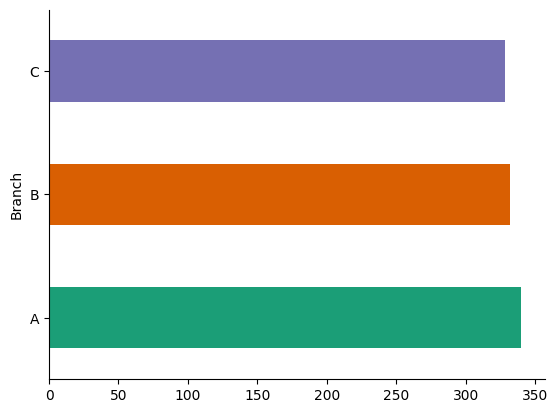

In [ ]:
# @title Branch

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Branch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

2. В якому місті знайходиться філіал з найвищим прибутком? Може в тому місці нам розмітисти ще один магазин.  
Знайдіть відповідь за допомогою функціоналу Pandas.

In [ ]:
branch_c_city = df[df['Branch'] == 'C']['City'].unique()
print(branch_c_city)

['Naypyitaw']


3.1. Створіть зводну таблицю, яка покаже, скільки покупок (інвойсів) було зроблено в кожній з філій (`Branch`) за різними категоріями товарів. Запишіть таблицю в змінну `invoices_by_category` і виведіть змінну на екран.
Ця таблиця допоможе проаналізувати, в якій філії купують найбільше товарів кожної з категорій.

In [18]:
invoices_by_category = pd.pivot_table(df, values='Invoice ID', columns ='Product line',
                                      index='Branch', aggfunc='count')

invoices_by_category

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1rueAdko6S3UxIHGtojetTxlES-EyM6Yb)

3.2. Викристовуючи змінну `invoices_by_category` дайте відповідь програмно (тобто значення треба не просто знайти очима, а вивести за допомогою коду), в якому філіалі магазину (`Branch`) найбільше інвойсів із покупкою товарів категорії "Електронні аксесуари" (`Electronic accessories`)?


In [22]:
most_electronic_accessories = invoices_by_category['Electronic accessories'].idxmax()

most_electronic_accessories

'A'

In [27]:
branch_with_most_ea_nlargest = invoices_by_category['Electronic accessories'].nlargest(1).index[0]
branch_with_most_ea_nlargest


'A'

In [28]:
branch_with_most_ea_alternative = invoices_by_category['Electronic accessories'].sort_values(ascending=False).index[0]
branch_with_most_ea_alternative

'A'

4-6. **Творче завдання на розвиток аналітичного мислення**

Крок 1. Сформулюйте ТРИ питання (гіпотези) до наявних даних, які допомогли б вам зрозуміти, які користувачі що, де та коли найбільше/найменше купують, аби дати на основі цих гіпотез рекомендації бізнесу. Звісно питання мають бути не тими, на які ми вже відповіли в завданнях модулю.

Крок 2. Знайдіть відповіді на свої питання з допомогою функціоналу pandas.

Крок 3. Напишіть, як відповідь на це питання може бути використана для прийняття бізнес рішень.   
   
 Питання можуть бути будь-якої складності, але їх має бути 3. Кожне питання оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат 🙌


Який час дня має найвищий обсяг продажів?
Гіпотеза: Піки продажів відбуваються в обідні години та ввечері після роботи, коли більшість людей роблять покупки.

Чи існує залежність між типом оплати і середнім чеком покупки?
Гіпотеза: Покупці, що використовують кредитні картки, можуть мати більший середній чек, оскільки безготівкові розрахунки сприяють більшим витратам.

Чи впливає членство в програмі лояльності на частоту покупок у різних категоріях товарів?
Гіпотеза: Члени програми лояльності можуть купувати дорожчі товари або робити покупки частіше через знижки та акції, що надаються учасникам програми.

In [57]:
# 1. Аналіз часу дня та обсягу продажів
# Для цього конвертуємо колонку з часом у відповідний формат і створимо категорії часу дня (ранок, день, вечір, ніч)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
time_bins = pd.cut(df['Time'].apply(lambda x: x.hour), bins=[0,6,12,18,24], include_lowest=True,
                   labels=['Ніч','Ранок','День','Вечір'])
time_sales_volume = df.groupby(time_bins)['Total'].count()

# 2. Залежність між типом оплати і середнім чеком
payment_mean_total = df.groupby('Payment')['Total'].mean()

# 3. Вплив членства на частоту покупок в різних категоріях
member_category_sales = df.groupby(['Customer type', 'Product line'])['Invoice ID'].count().unstack()

# Виведемо результати
time_sales_volume, payment_mean_total, member_category_sales

# Перетворимо результати в красиво відформатовані DataFrame за допомогою pandas
formatted_payment_mean_total = payment_mean_total.reset_index().rename(
    columns={'Total': 'Середній чек', 'Payment': 'Тип оплати'}
).style.format({'Середній чек': "{:.2f}"}).set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Тип оплати і середній чек")


formatted_time_sales_volume = time_sales_volume.reset_index().rename(
    columns={'Total': 'Кількість продажів', 'Time': 'Час доби'}
).style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Час дня та обсяг продажів")


formatted_member_category_sales = member_category_sales_df.rename(
    index={'Member': 'Член', 'Normal': 'Не член'}
).style.format("{:.0f}").set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Вплив членства на частоту покупок")

# Відобразимо відформатовану таблицю 'Тип оплати і середній чек'
display(formatted_payment_mean_total)

# Відобразимо відформатовану таблицю 'Час дня та обсяг продажів'
display(formatted_time_sales_volume)

# Відобразимо відформатовану таблицю 'Вплив членства на частоту покупок'
display(formatted_member_category_sales)

,Тип оплати,Середній чек
0,Cash,326.18
1,Credit card,324.01
2,Ewallet,318.82


,Час доби,Кількість продажів
0,Ніч,0
1,Ранок,280
2,День,532
3,Вечір,188


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Член,78,86,94,73,83,87
Не член,92,92,80,79,77,79


**Час дня та обсяг продажів:**
Пік продажів припадає на денні години з 12 до 18 години, з 532 інвойсами.
Рекомендація: Зосередити маркетингові та промоційні заходи в денний час, забезпечити достатню кількість персоналу в пікові години, щоб оптимізувати обслуговування клієнтів.

**Тип оплати і середній чек:**
Середній чек найвищий при розрахунку готівкою (326.18), а найнижчий - при використанні Ewallet (318.82).
Рекомендація: Хоча різниця не є значною, можливо варто підштовхнути клієнтів до безготівкових платежів через бонусні програми, знижки чи нагороди за покупки, оплачені картою або електронним гаманцем.

**Членство в програмі лояльності і частота покупок:**
Члени програми лояльності купують більше в категоріях "Fashion accessories", "Food and beverages", і "Sports and travel".
Рекомендація: Запропонувати спеціальні акції або бонуси для членів програми в цих категоріях, а також розглянути можливість розширення асортименту товарів або покращення програм лояльності для збільшення продажів у категоріях, де члени програми вже активні.